# Data Exploration

## Imports

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

## Read data

In [18]:
trainD = pd.read_csv('Data/train.csv',thousands='.',parse_dates=['date'])

## Basic Exploration

In [19]:
trainD.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0,0
1,1,2013-01-01,1,BABY CARE,0,0
2,2,2013-01-01,1,BEAUTY,0,0
3,3,2013-01-01,1,BEVERAGES,0,0
4,4,2013-01-01,1,BOOKS,0,0


In [10]:
trainD.family.unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [11]:
trainD.groupby('family')['sales'].sum()

family
AUTOMOTIVE                         5548220
BABY CARE                           100510
BEAUTY                             3378930
BEVERAGES                       2169544860
BOOKS                                64380
BREAD/BAKERY                   70430616517
CELEBRATION                        7611770
CLEANING                         975212890
DAIRY                            644877090
DELI                           46802472659
EGGS                             155882960
FROZEN FOODS                  127240613908
GROCERY I                      59052944929
GROCERY II                        19627670
HARDWARE                           1034700
HOME AND KITCHEN I                18614910
HOME AND KITCHEN II               15206700
HOME APPLIANCES                     416010
HOME CARE                        160227440
LADIESWEAR                         6511590
LAWN AND GARDEN                    5488420
LINGERIE                           6531140
LIQUOR,WINE,BEER                  77466400
MAGA

<AxesSubplot:xlabel='date'>

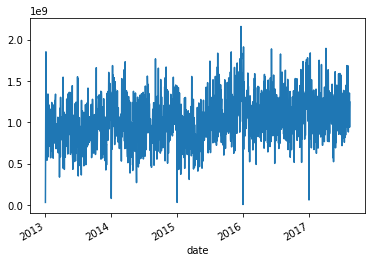

In [25]:
salesPdate = trainD.groupby('date')['sales'].sum()
salesPdate.plot()

In [28]:
trainD.groupby(['date','family'])['sales'].sum()

date        family                    
2013-01-01  AUTOMOTIVE                            0
            BABY CARE                             0
            BEAUTY                               20
            BEVERAGES                          8100
            BOOKS                                 0
                                            ...    
2017-08-15  POULTRY                       143842548
            PREPARED FOODS                395528360
            PRODUCE                       112067962
            SCHOOL AND OFFICE SUPPLIES        25300
            SEAFOOD                        90099072
Name: sales, Length: 55572, dtype: int64